In [2]:
import sys
import pandas as pd
import numpy as np
sys.path.append("..")
from data.data_handler import import_dataset
import seaborn as sns

## By Player and Year 2010 - 2018

In [3]:
per_year_df = pd.read_csv("../data/pgaTourData.csv")

# no points means no scores
per_year_df = per_year_df.dropna(subset=["Points", "Average Score"])

# commas to floats
per_year_df["Points"] = per_year_df["Points"].str.replace(',', '').astype(float)
per_year_df = per_year_df.fillna(0)
per_year_df

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868.0,0.0,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006.0,1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020.0,0.0,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795.0,0.0,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421.0,0.0,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,Phil Mickelson,76.0,52.66,2010,299.1,65.13,28.79,61.84,69.966,1629.0,1.0,5.0,-0.147,1.001,0.185,0.738,0.228,"3,821,733"
1674,John Daly,63.0,52.21,2010,305.7,65.66,29.78,53.53,71.697,97.0,0.0,0.0,-0.653,-0.989,0.336,-0.374,-0.298,"158,587"
1675,Jimmy Walker,82.0,51.29,2010,292.9,65.88,29.14,58.46,70.953,554.0,0.0,2.0,0.252,0.093,-0.538,0.336,0.047,"937,987"
1676,Daniel Chopra,74.0,51.27,2010,295.9,61.64,28.88,56.16,72.194,142.0,0.0,0.0,0.361,-1.096,-0.307,-1.070,-0.084,"311,405"


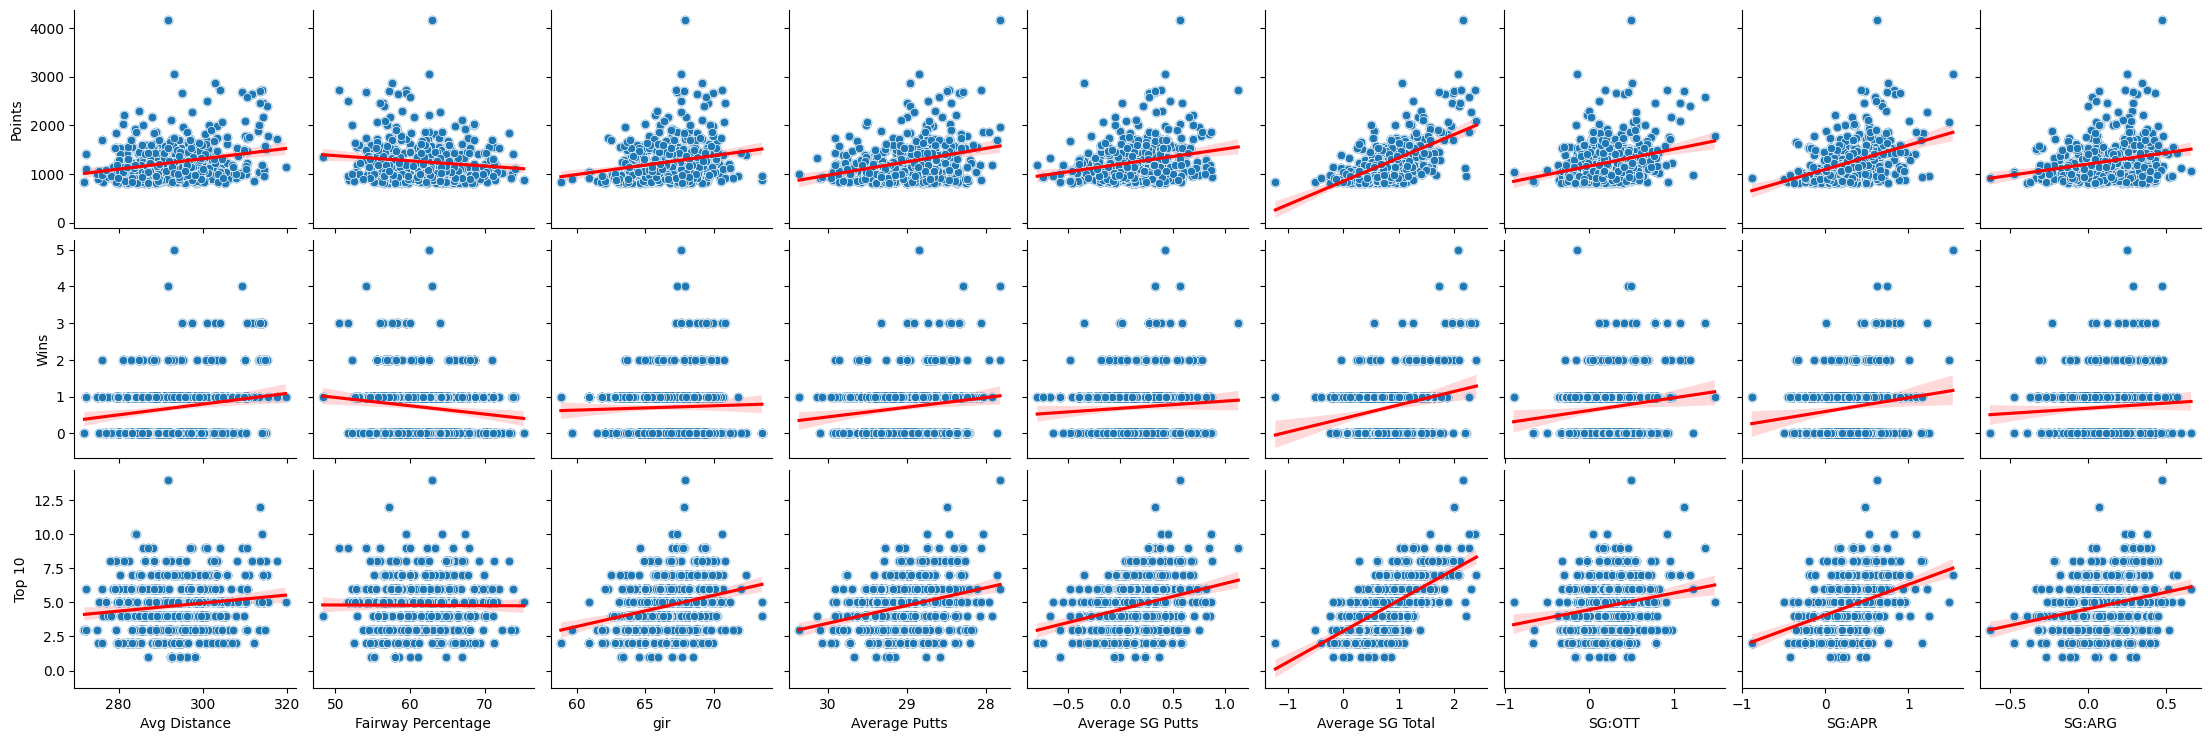

In [4]:
df_to_plot = per_year_df.drop(columns=["Rounds", "Average Scrambling", "Money", "Average Score"])
top_ten_percent  = df_to_plot["Points"].quantile(.75)

df_to_plot = df_to_plot[df_to_plot["Points"] >= top_ten_percent]

graph = sns.pairplot(df_to_plot.drop(columns=["Year",]), kind="reg", plot_kws={'line_kws':{'color':'red'}}, y_vars=["Points", "Wins", "Top 10"], x_vars=["Avg Distance", "Fairway Percentage", "gir", "Average Putts", "Average SG Putts", "Average SG Total", "SG:OTT", "SG:APR", "SG:ARG"])
# Flip x axis for Avg Putts since less putts is better
graph.axes[2][3].invert_xaxis()
graph.map(sns.scatterplot)


## Sum / Mean by Player 2010-2018

In [11]:
avg_2010_to_2018_df = pd.read_csv("../data/pgaTourData.csv").drop(columns=["Year"])
avg_2010_to_2018_df["Money"] = avg_2010_to_2018_df["Money"].str.replace(',', '').str.replace("$", "").astype(float)
avg_2010_to_2018_df["Points"] = avg_2010_to_2018_df["Points"].str.replace(',', '').astype(float)


aggregations = {
    "Rounds" : sum,
    "Wins" : sum,
    "Top 10" : sum,
    "Points" : sum,
    "Money" : sum,
    "Fairway Percentage" : np.mean,
    "Avg Distance" : np.mean,
    "gir" : np.mean,
    "Average Putts" : np.mean,
    "Average Scrambling" : np.mean,
    "Average Score" : np.mean,
    "Average SG Putts" : np.mean,
    "Average SG Total" : np.mean,
    "SG:OTT" : np.mean,
    "SG:APR" : np.mean,
    "SG:ARG" : np.mean,
}

avg_2010_to_2018_df = avg_2010_to_2018_df.groupby(["Player Name"]).agg(aggregations).dropna(subset=["Points"])
avg_2010_to_2018_df

/var/folders/5_/2z9ny5950t57nyvwn68j6pg00000gn/T/ipykernel_54649/3042009957.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  avg_2010_to_2018_df["Money"] = avg_2010_to_2018_df["Money"].str.replace(',', '').str.replace("$", "").astype(float)


,Rounds,Wins,Top 10,Points,Money,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG
Player Name,,,,,,,,,,,,,,,,
Aaron Baddeley,700.0,2.0,21.0,5103.0,10419470.0,53.427778,293.677778,61.945556,28.295556,60.074444,71.008444,0.473333,0.152444,-0.342667,-0.310333,0.333111
Aaron Watkins,46.0,0.0,1.0,126.0,217495.0,63.030000,277.100000,62.250000,28.750000,59.530000,71.770000,0.402000,-0.589000,-0.568000,-0.707000,0.285000
Aaron Wise,90.0,1.0,3.0,1086.0,3486407.0,63.330000,302.900000,68.810000,29.150000,56.280000,70.247000,0.238000,0.703000,0.410000,0.012000,0.042000
Abraham Ancer,149.0,0.0,4.0,736.0,1839506.0,64.530000,286.250000,64.150000,28.985000,59.680000,71.398000,-0.238500,-0.203500,0.150500,-0.133000,0.017500
Adam Hadwin,378.0,1.0,13.0,3207.0,7392920.0,64.375000,289.600000,66.387500,28.847500,59.680000,70.768250,0.319750,0.486250,0.075000,0.026250,0.043250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Johnson,803.0,5.0,42.0,10935.0,27540362.0,68.653333,282.144444,66.458889,28.727778,60.882222,70.107444,0.362222,0.896778,0.052778,0.322222,0.165222
Zack Miller,86.0,0.0,1.0,295.0,564453.0,57.060000,299.500000,61.790000,29.450000,54.260000,71.890000,-0.483000,-1.051000,0.057000,-0.612000,-0.012000
Zack Sucher,0.0,0.0,0.0,88.0,120749.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
power_winners_df = avg_2010_to_2018_df
power_winners_df = power_winners_df[(power_winners_df["Wins"] != 0) & (power_winners_df["Rounds"] != 0) & (power_winners_df["Rounds"] > 100)]
power_winners_df["Rounds / Wins"] = avg_2010_to_2018_df["Rounds"] / avg_2010_to_2018_df["Wins"]

power_winners_df.sort_values(by="Rounds / Wins", ascending=True).head(15)

/var/folders/5_/2z9ny5950t57nyvwn68j6pg00000gn/T/ipykernel_54649/2368644132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_winners_df["Rounds / Wins"] = avg_2010_to_2018_df["Rounds"] / avg_2010_to_2018_df["Wins"]


,Rounds,Wins,Top 10,Points,Money,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Rounds / Wins
Player Name,,,,,,,,,,,,,,,,,
Tiger Woods,198.0,8.0,23.0,7499.0,22642314.0,61.926667,298.066667,67.523333,28.750000,62.443333,69.066000,0.343667,1.990000,0.157333,1.213333,0.275333,24.750000
Rory McIlroy,420.0,9.0,49.0,11049.0,38179146.0,58.417143,309.428571,67.050000,28.817143,59.765714,69.545286,-0.062429,1.525143,0.959571,0.476143,0.132857,46.666667
Justin Thomas,382.0,8.0,29.0,7842.0,25021311.0,56.170000,306.400000,67.662500,28.635000,60.030000,69.788250,0.115250,1.211750,0.310250,0.615250,0.192750,47.750000
Dustin Johnson,670.0,13.0,64.0,16247.0,51453494.0,56.551111,312.155556,67.991111,28.904444,58.097778,69.646778,0.065444,1.443556,0.835667,0.541333,-0.009222,51.538462
Jordan Spieth,521.0,10.0,47.0,12878.0,38018072.0,61.445000,293.516667,66.873333,28.268333,62.633333,69.470333,0.359000,1.499000,0.355500,0.472333,0.301333,52.100000
Bubba Watson,686.0,12.0,40.0,13773.0,36804576.0,57.793333,311.411111,68.377778,29.464444,55.940000,70.185444,-0.114000,0.998778,0.965444,0.235667,-0.092333,57.166667
Martin Kaymer,126.0,2.0,7.0,2447.0,6417231.0,61.315000,291.650000,64.715000,29.500000,53.010000,70.513500,0.013000,0.189500,0.340500,0.150000,-0.314500,63.000000
Steve Stricker,320.0,5.0,30.0,8139.0,20471270.0,65.632000,283.740000,67.360000,28.470000,64.082000,69.555200,0.538200,1.551400,0.045000,0.554600,0.414000,64.000000
Jason Day,652.0,10.0,48.0,12746.0,40938895.0,55.573333,304.900000,65.573333,28.471111,62.374444,69.742444,0.513333,1.302333,0.330111,0.120889,0.319000,65.200000


(4, 9)


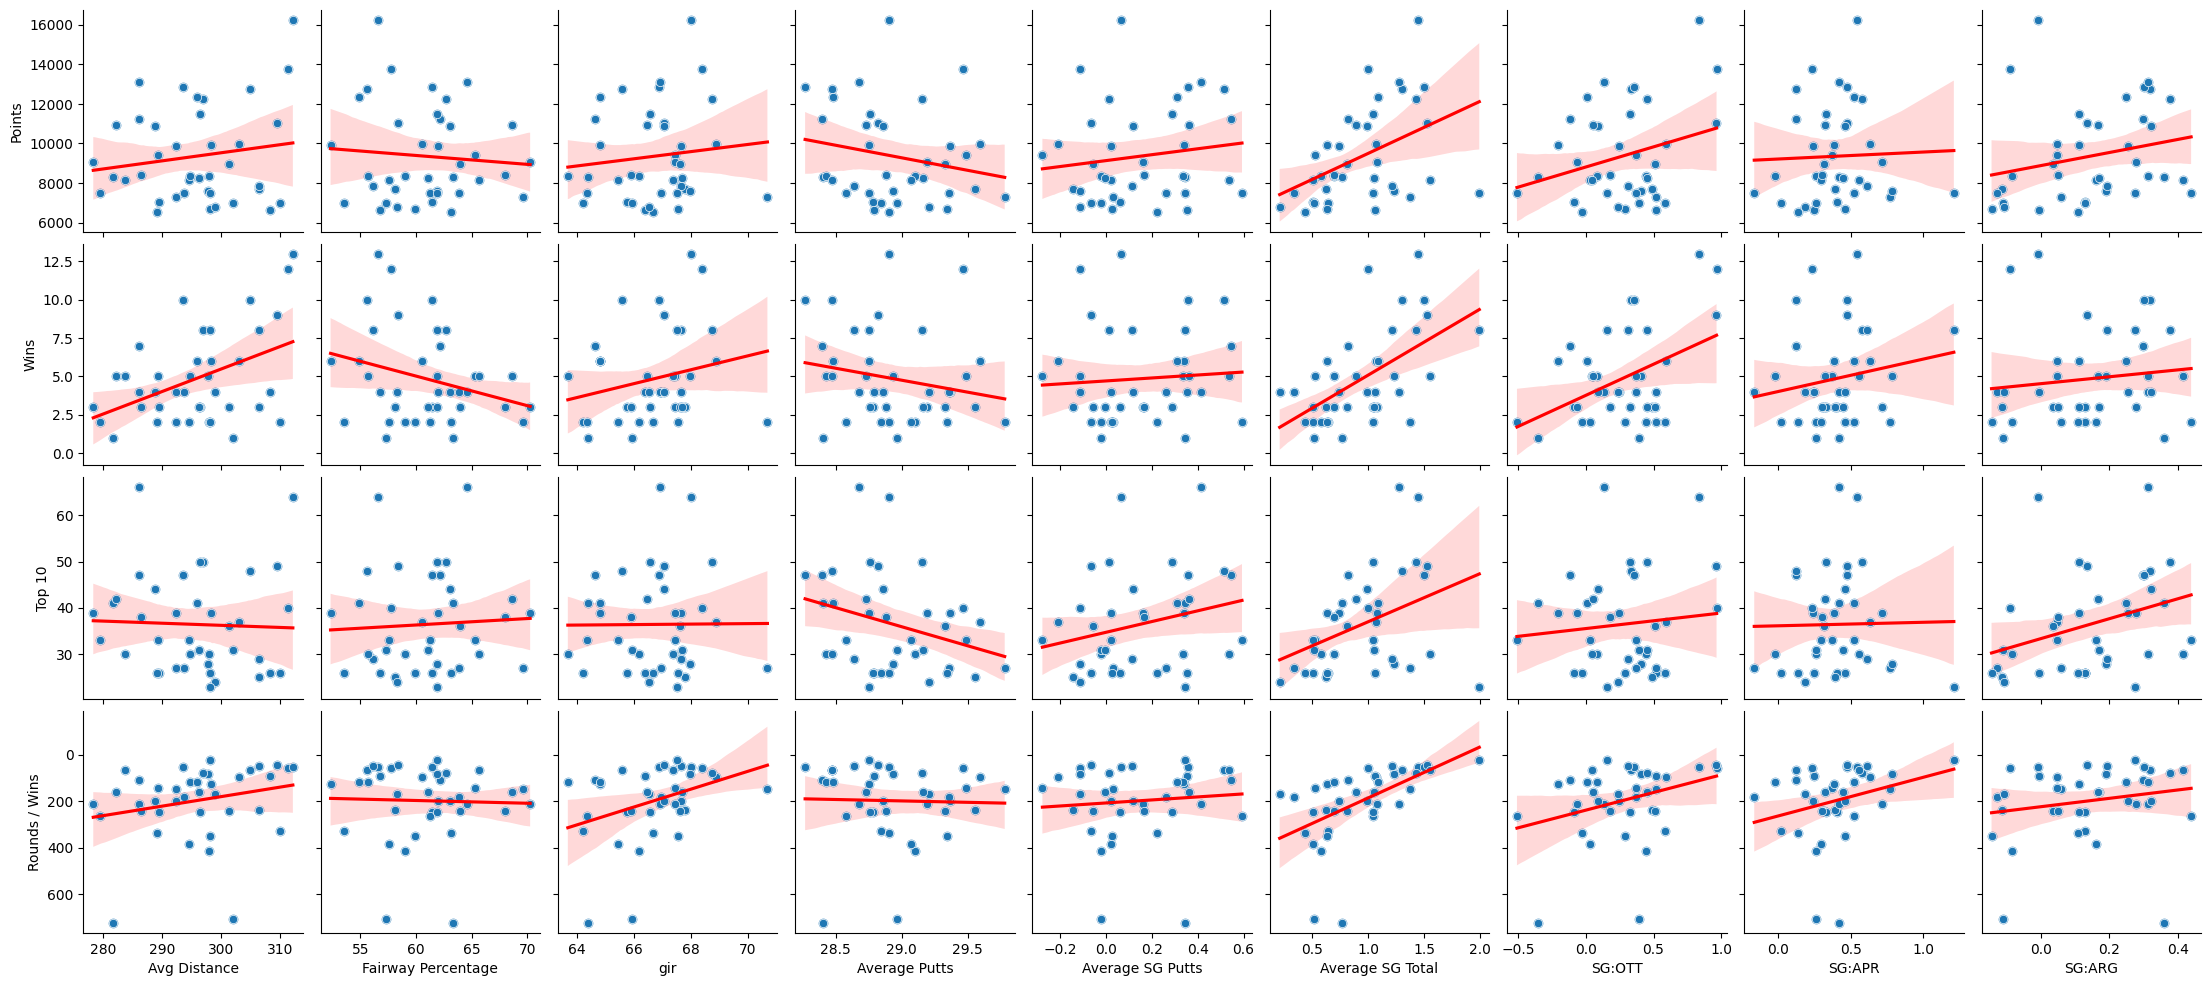

In [19]:
df_to_plot = power_winners_df.drop(columns=["Rounds", "Average Score"])
top_ten_percent  = df_to_plot["Points"].quantile(.75)

df_to_plot = df_to_plot[df_to_plot["Points"] >= top_ten_percent]

graph = sns.pairplot(df_to_plot, kind="reg", plot_kws={'line_kws':{'color':'red'}}, y_vars=["Points", "Wins", "Top 10", "Rounds / Wins"], x_vars=["Avg Distance", "Fairway Percentage", "gir", "Average Putts", "Average SG Putts", "Average SG Total", "SG:OTT", "SG:APR", "SG:ARG"])
print(graph.axes.shape)

# Flip x axis for Avg Putts since less putts is better
graph.axes[2][3].invert_xaxis()

for ax in graph.axes[3]:
    ax.invert_yaxis()

graph.axes[2][3].invert_xaxis()
graph.map(sns.scatterplot)

## Top 15 by Wins 
"What does it take to win consistently"

In [51]:
avg_2010_to_2018_df.sort_values(by="Wins", ascending=False).head(15)

,Rounds,Wins,Top 10,Points,Money,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG
Player Name,,,,,,,,,,,,,,,,
Dustin Johnson,670.0,13.0,64.0,16247.0,51453494.0,56.551111,312.155556,67.991111,28.904444,58.097778,69.646778,0.065444,1.443556,0.835667,0.541333,-0.009222
Bubba Watson,686.0,12.0,40.0,13773.0,36804576.0,57.793333,311.411111,68.377778,29.464444,55.940000,70.185444,-0.114000,0.998778,0.965444,0.235667,-0.092333
Jason Day,652.0,10.0,48.0,12746.0,40938895.0,55.573333,304.900000,65.573333,28.471111,62.374444,69.742444,0.513333,1.302333,0.330111,0.120889,0.319000
Jordan Spieth,521.0,10.0,47.0,12878.0,38018072.0,61.445000,293.516667,66.873333,28.268333,62.633333,69.470333,0.359000,1.499000,0.355500,0.472333,0.301333
Rory McIlroy,420.0,9.0,49.0,11049.0,38179146.0,58.417143,309.428571,67.050000,28.817143,59.765714,69.545286,-0.062429,1.525143,0.959571,0.476143,0.132857
Justin Thomas,382.0,8.0,29.0,7842.0,25021311.0,56.170000,306.400000,67.662500,28.635000,60.030000,69.788250,0.115250,1.211750,0.310250,0.615250,0.192750
Justin Rose,628.0,8.0,50.0,12267.0,39292625.0,62.668889,296.922222,68.725556,29.156667,60.600000,69.688778,0.014111,1.427667,0.453111,0.579000,0.377333
Tiger Woods,198.0,8.0,23.0,7499.0,22642314.0,61.926667,298.066667,67.523333,28.750000,62.443333,69.066000,0.343667,1.990000,0.157333,1.213333,0.275333
Brandt Snedeker,751.0,7.0,47.0,11258.0,28883076.0,62.166667,286.088889,64.634444,28.396667,61.688889,70.134889,0.545667,0.823889,-0.117111,0.123000,0.296667


## Top 15 by Points
"What does it take to play consistently"

In [52]:
avg_2010_to_2018_df.sort_values(by="Points", ascending=False).head(15)

,Rounds,Wins,Top 10,Points,Money,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG
Player Name,,,,,,,,,,,,,,,,
Dustin Johnson,670.0,13.0,64.0,16247.0,51453494.0,56.551111,312.155556,67.991111,28.904444,58.097778,69.646778,0.065444,1.443556,0.835667,0.541333,-0.009222
Bubba Watson,686.0,12.0,40.0,13773.0,36804576.0,57.793333,311.411111,68.377778,29.464444,55.940000,70.185444,-0.114000,0.998778,0.965444,0.235667,-0.092333
Matt Kuchar,841.0,4.0,66.0,13110.0,35956219.0,64.614444,286.155556,66.917778,28.678889,63.405556,69.747333,0.414556,1.275889,0.136778,0.419889,0.313444
Jordan Spieth,521.0,10.0,47.0,12878.0,38018072.0,61.445000,293.516667,66.873333,28.268333,62.633333,69.470333,0.359000,1.499000,0.355500,0.472333,0.301333
Jason Day,652.0,10.0,48.0,12746.0,40938895.0,55.573333,304.900000,65.573333,28.471111,62.374444,69.742444,0.513333,1.302333,0.330111,0.120889,0.319000
Phil Mickelson,703.0,6.0,41.0,12351.0,32317468.0,54.915556,295.855556,64.827778,28.477778,60.860000,70.037778,0.310444,1.092556,0.009778,0.524444,0.248333
Justin Rose,628.0,8.0,50.0,12267.0,39292625.0,62.668889,296.922222,68.725556,29.156667,60.600000,69.688778,0.014111,1.427667,0.453111,0.579000,0.377333
Rickie Fowler,740.0,3.0,50.0,11487.0,33436368.0,61.878889,296.444444,66.558889,28.760000,60.242222,70.032444,0.289222,1.044000,0.325667,0.330111,0.111556
Brandt Snedeker,751.0,7.0,47.0,11258.0,28883076.0,62.166667,286.088889,64.634444,28.396667,61.688889,70.134889,0.545667,0.823889,-0.117111,0.123000,0.296667


## Higher positive slope means more important to winning 
Can see that Avg SG Total (Average Shots Gained Total) is most important followed by SG:APR (Shots Gained Approach) <br><br>

Shots Gained Total is simply how much better than the field you were so it makese sense this is by far the most important. Next and most interestingly, we see that shots gained approach, any shot hit 30 yrds or more from the green not counting tee shots, is the most impportant statistic.

(3, 9)


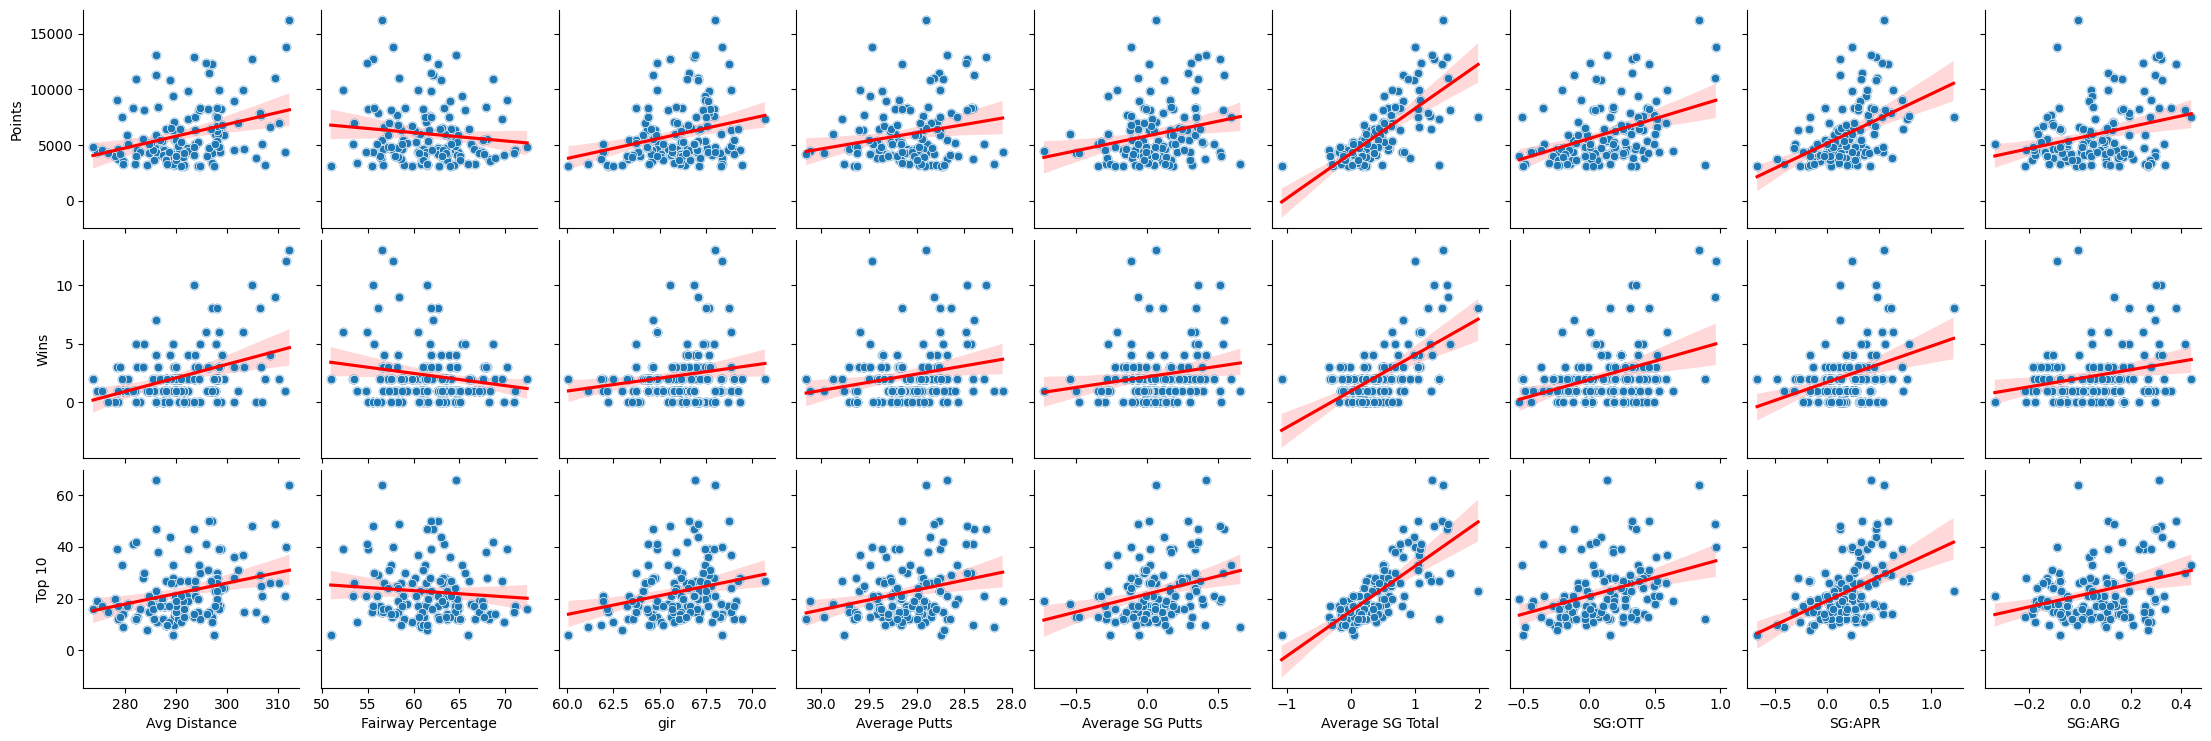

In [74]:
df_to_plot = avg_2010_to_2018_df.drop(columns=["Rounds", "Average Score"])
top_ten_percent  = df_to_plot["Points"].quantile(.75)

df_to_plot = df_to_plot[df_to_plot["Points"] >= top_ten_percent]

graph = sns.pairplot(df_to_plot, kind="reg", plot_kws={'line_kws':{'color':'red'}}, y_vars=["Points", "Wins", "Top 10"], x_vars=["Avg Distance", "Fairway Percentage", "gir", "Average Putts", "Average SG Putts", "Average SG Total", "SG:OTT", "SG:APR", "SG:ARG"])
print(graph.axes.shape)

# Flip x axis for Avg Putts since less putts is better
graph.axes[2][3].invert_xaxis()
graph.map(sns.scatterplot)


In [20]:
x_train, y_train, x_test, y_test = import_dataset('../data/pgaTourData.csv', True)

In [21]:
cols_to_scale = ["", 'Rounds', 'Fairway Percentage', 'Avg Distance',
            'gir', 'Average Putts', 'Average Scrambling', 'Average Score', 'Points',
            'Wins', 'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR',
            'SG:ARG']
pd.DataFrame(x_train, columns=cols_to_scale)

,,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG
0,Peter Malnati,0.874308,0.320284,-0.949785,-1.153841,-1.457302,0.958337,0.692939,-1.002207,-0.393299,1.232496,-0.485655,-0.793932,-1.628411,0.757004
1,Marc Leishman,0.591819,-0.615354,0.471811,0.360771,0.536984,-0.391782,-0.206457,0.239012,-0.393299,-0.499201,0.384964,0.094432,0.909417,0.224225
2,Alex Prugh,0.662441,-0.609419,0.550167,1.058433,0.594512,-0.846714,-0.050847,-0.234259,-0.393299,0.51023,-0.086501,0.929917,-0.957699,-0.990331
3,Scott Brown,0.662441,0.429079,0.191969,-0.23206,0.115116,0.233381,0.263228,0.026933,-0.393299,-0.023492,-0.012744,0.89819,-0.507105,-0.656216
4,Hunter Mahan,-1.244357,-0.860637,0.449424,-1.056241,0.000061,-0.873129,1.700833,-1.020066,-0.393299,0.76839,-1.337473,-0.011326,-2.208485,-1.50505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,Brendon Todd,2.074884,0.66645,-1.173658,-0.608002,-1.610709,1.56589,-1.234337,2.033867,1.512456,1.850338,0.927293,-0.061561,-0.621049,1.203997
1251,Charl Schwartzel,-1.03249,-0.40172,0.785234,-0.774284,-1.572357,1.008233,-1.773975,0.33947,-0.393299,0.083833,1.719817,1.352948,0.645275,1.799988
1252,Andrew Svoboda,-0.114402,0.921624,-0.378908,0.881306,1.035556,0.239252,-0.286403,0.035863,-0.393299,-0.151121,0.277944,0.192258,0.665992,-0.389826
1253,John Rollins,-0.114402,-0.57777,0.538973,0.635498,0.383578,-0.154044,-0.19218,0.145251,-0.393299,-0.780566,0.108738,0.332387,0.8887,-0.565914
